In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 28, 18
plt.style.use('ggplot')
import time

In [2]:
ticks=['GOOGL','FB','NFLX','AAPL','GOOGL','SQ','C', 'CAT', 'IBM', 'JPM', 'V','PYPL', 'SBUX', 'CSCO', 'WMT']
#'SPY','EEM','QQQ', 'IWM', 'HYG', 'EFA', 'FXI', 'GDX', 'EWZ', 'GLD', 'XOP','SLV', 'XLF', 'USO', 'TLT', 'XLE', 'KRE', 'SMH', 'XLU', 'OIH']

In [3]:
import yfinance as yf
dat = yf.download(ticks, start="2019-12-12", end=time.strftime("%Y-%m-%d"))
dat=dat['Adj Close']

[*********************100%***********************]  14 of 14 completed


In [4]:
#Cierre de día anterior
dat.iloc[-1]

AAPL      122.410004
C          58.930000
CAT       179.289993
CSCO       44.320000
FB        273.549988
GOOGL    1774.800049
IBM       124.269997
JPM       119.559998
NFLX      503.220001
PYPL      214.059998
SBUX      103.000000
SQ        216.589996
V         206.240005
WMT       147.000000
Name: 2020-12-11 00:00:00, dtype: float64

In [5]:
def tot(i,x):
    tot=yf.Ticker(i).option_chain(yf.Ticker(i).options[x]).calls.openInterest.sum()+\
    yf.Ticker(i).option_chain(yf.Ticker(i).options[x]).puts.openInterest.sum()
    return tot

In [6]:
%%time 

d={}
for i in ticks:
    nom=f'{i}'
    try: d[nom]=(tot(i,0),tot(i,1),tot(i,2),tot(i,3),tot(i,4),tot(i,5))
    except: pass

Wall time: 2min 27s


In [7]:
pd.DataFrame(d)

,GOOGL,FB,NFLX,AAPL,SQ,C,CAT,IBM,JPM,V,PYPL,SBUX,CSCO,WMT
0,59775.0,436507.0,168567,2781470.0,163964,405848,52846.0,96777,274639,120858.0,151536.0,69983,234313,130474.0
1,9123.0,28418.0,14726,187563.0,12000,16063,10627.0,13135,8397,9232.0,12812.0,10956,27065,17757.0
2,6077.0,36234.0,13981,253766.0,8661,19752,2681.0,5078,8269,5629.0,9702.0,8598,53773,15142.0
3,1588.0,11233.0,5676,70791.0,4310,7825,1242.0,3034,2334,2675.0,3496.0,3003,5353,7622.0
4,81104.0,747569.0,291575,4658700.0,393263,770842,133646.0,176166,410651,222538.0,268668.0,277117,575244,259200.0
5,1340.0,5439.0,1559,33908.0,1825,3713,714.0,2064,1680,2368.0,1842.0,1480,3728,6403.0


In [8]:
pd.DataFrame(d) # a veces me falla y tengo q incluir index=[0]

,GOOGL,FB,NFLX,AAPL,SQ,C,CAT,IBM,JPM,V,PYPL,SBUX,CSCO,WMT
0,59775.0,436507.0,168567,2781470.0,163964,405848,52846.0,96777,274639,120858.0,151536.0,69983,234313,130474.0
1,9123.0,28418.0,14726,187563.0,12000,16063,10627.0,13135,8397,9232.0,12812.0,10956,27065,17757.0
2,6077.0,36234.0,13981,253766.0,8661,19752,2681.0,5078,8269,5629.0,9702.0,8598,53773,15142.0
3,1588.0,11233.0,5676,70791.0,4310,7825,1242.0,3034,2334,2675.0,3496.0,3003,5353,7622.0
4,81104.0,747569.0,291575,4658700.0,393263,770842,133646.0,176166,410651,222538.0,268668.0,277117,575244,259200.0
5,1340.0,5439.0,1559,33908.0,1825,3713,714.0,2064,1680,2368.0,1842.0,1480,3728,6403.0


In [9]:
I=ticks[0] # Selecciono primer ticker
# Defino vencimiento
v=4

In [10]:
yf.Ticker(I).options[v]

'2021-01-15'

In [11]:
%%time 

std_1={}
for i in ticks:
    try:std_1[i]=dat[i]
    except: pass

Wall time: 999 µs


In [12]:
pd.DataFrame(std_1)

,GOOGL,FB,NFLX,AAPL,SQ,C,CAT,IBM,JPM,V,PYPL,SBUX,CSCO,WMT
Date,,,,,,,,,,,,,,
2019-12-11,1344.250000,202.259995,298.929993,66.567886,65.750000,72.619591,139.788925,127.094673,129.478012,180.896515,105.510002,84.840210,42.808815,117.046104
2019-12-12,1348.489990,196.750000,298.440002,66.737518,65.860001,74.061409,142.487640,128.576935,133.183472,181.522675,105.669998,86.427483,44.152630,117.793625
2019-12-13,1346.869995,194.110001,298.500000,67.644707,64.800003,73.427002,141.274155,127.522255,132.015869,184.007370,107.650002,86.878181,43.794926,118.314934
2019-12-16,1360.699951,197.919998,304.209991,68.802635,66.529999,73.926826,141.109146,127.446236,132.527283,185.100647,109.570000,86.985954,44.452335,118.560814
2019-12-17,1354.890015,198.389999,315.480011,68.937851,65.550003,74.724632,142.089615,127.531746,133.337845,184.385056,108.459999,86.349091,44.897049,119.288666
2019-12-18,1351.910034,202.500000,320.799988,68.773132,65.139999,74.897652,142.817657,127.712273,133.202759,183.768845,107.830002,86.211922,45.090408,117.891991
2019-12-19,1356.439941,206.059998,332.220001,68.841965,64.550003,75.166794,140.779083,127.854813,132.536957,185.398804,108.879997,86.731209,46.289211,118.108376
2019-12-20,1351.219971,206.300003,336.899994,68.699387,63.630001,75.464775,143.254532,128.833481,132.430801,186.849869,108.750000,86.672424,45.873497,118.314934
2019-12-23,1350.630005,206.179993,333.100006,69.820442,62.799999,75.705078,144.157303,128.795471,132.392197,185.935501,108.610001,86.447067,46.501900,117.075607


In [13]:
dat['GOOGL'].describe()

count     254.000000
mean     1458.331734
std       165.596934
min      1054.130005
25%      1362.487488
50%      1456.149963
75%      1529.819977
max      1824.969971
Name: GOOGL, dtype: float64

In [14]:
dat['GOOGL'].std()

165.59693390025495

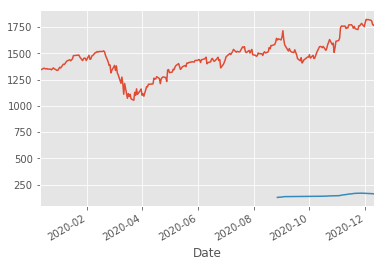

In [15]:
dat['GOOGL'].plot()
dat['GOOGL'].rolling(180).std().plot()

In [16]:
%%time 

oi_c={}
strk_c={}
oi_p={}
strk_p={}

for i in ticks:
    try:oi_c[i]=yf.Ticker(i).option_chain(yf.Ticker(i).options[v]).calls.openInterest
    except: pass
    try:strk_c[i]=yf.Ticker(i).option_chain(yf.Ticker(i).options[v]).calls.strike
    except: pass
    try:oi_p[i]=yf.Ticker(i).option_chain(yf.Ticker(i).options[v]).puts.openInterest
    except: pass
    try:strk_p[i]=yf.Ticker(i).option_chain(yf.Ticker(i).options[v]).puts.strike
    except: pass

Wall time: 53.2 s


In [17]:
ticks[0]

'GOOGL'

In [18]:
#ticks.remove("SBUX") 
#ticks.remove("V") 

In [19]:
I=ticks[0] # Selecciono primer ticker
# Defino vencimiento
v=4

In [20]:
yf.Ticker(I).options[v]

'2021-01-15'

In [21]:
%%time 

oi_c={}
strk_c={}
oi_p={}
strk_p={}

for i in ticks:
    try:oi_c[i]=yf.Ticker(i).option_chain(yf.Ticker(i).options[v]).calls.openInterest
    except: pass
    try:strk_c[i]=yf.Ticker(i).option_chain(yf.Ticker(i).options[v]).calls.strike
    except: pass
    try:oi_p[i]=yf.Ticker(i).option_chain(yf.Ticker(i).options[v]).puts.openInterest
    except: pass
    try:strk_p[i]=yf.Ticker(i).option_chain(yf.Ticker(i).options[v]).puts.strike
    except: pass

Wall time: 52.8 s


In [22]:
def OIC(s):
    return (pd.DataFrame(pd.DataFrame(oi_c)[s])).set_index(pd.DataFrame(strk_c)[s])
def OIP(s):
    return (pd.DataFrame(pd.DataFrame(oi_p)[s])).set_index(pd.DataFrame(strk_p)[s])

In [23]:
OICCC={}
for i in ticks:
    nom=f'{i}'
    try:OICCC[nom]=(OIC(i))
    except: pass    
OIPPP={}
for i in ticks:
    nom=f'{i}'
    try:OIPPP[nom]=(OIP(i))
    except: pass

In [24]:
strikes={}
for i in ticks:
    strikes[i]=(pd.DataFrame((set(pd.DataFrame(strk_c)[i].tolist()+pd.DataFrame(strk_p)[i].tolist())))[0]).sort_values().reset_index(drop=True)

In [25]:
def strikepeg(i):
    return pd.DataFrame(i,index=[0]).T.where(pd.DataFrame(i,index=[0]).T.shift()<0).where(pd.DataFrame(i,index=[0]).T>0).dropna().index[0]

In [26]:
GOOGL={}
for n in pd.DataFrame(strikes)['GOOGL'].dropna().tolist():
    try: GOOGL[n]=(OICCC['GOOGL'].loc[OICCC['GOOGL'].index[0]:n].sum()[0])-(OIPPP['GOOGL'].loc[n:OIPPP['GOOGL'].index[-1]].sum()[0])
    except: pass
FB={}
for n in pd.DataFrame(strikes)['FB'].dropna().tolist():
    try: FB[n]=(OICCC['FB'].loc[OICCC['FB'].index[0]:n].sum()[0])-(OIPPP['FB'].loc[n:OIPPP['FB'].index[-1]].sum()[0])
    except: pass
NFLX={}
for n in pd.DataFrame(strikes)['NFLX'].dropna().tolist():
    try: NFLX[n]=(OICCC['NFLX'].loc[OICCC['NFLX'].index[0]:n].sum()[0])-(OIPPP['NFLX'].loc[n:OIPPP['NFLX'].index[-1]].sum()[0])
    except: pass
AAPL={}
for n in pd.DataFrame(strikes)['AAPL'].dropna().tolist():
    try: AAPL[n]=(OICCC['AAPL'].loc[OICCC['AAPL'].index[0]:n].sum()[0])-(OIPPP['AAPL'].loc[n:OIPPP['AAPL'].index[-1]].sum()[0])
    except: pass
SQ={}
for n in pd.DataFrame(strikes)['SQ'].dropna().tolist():
    try: SQ[n]=(OICCC['SQ'].loc[OICCC['SQ'].index[0]:n].sum()[0])-(OIPPP['SQ'].loc[n:OIPPP['SQ'].index[-1]].sum()[0])
    except: pass
C={}
for n in pd.DataFrame(strikes)['C'].dropna().tolist():
    try: C[n]=(OICCC['C'].loc[OICCC['C'].index[0]:n].sum()[0])-(OIPPP['C'].loc[n:OIPPP['C'].index[-1]].sum()[0])
    except: pass
CAT={}
for n in pd.DataFrame(strikes)['CAT'].dropna().tolist():
    try: CAT[n]=(OICCC['CAT'].loc[OICCC['CAT'].index[0]:n].sum()[0])-(OIPPP['CAT'].loc[n:OIPPP['CAT'].index[-1]].sum()[0])
    except: pass
IBM={}
for n in pd.DataFrame(strikes)['IBM'].dropna().tolist():
    try: IBM[n]=(OICCC['IBM'].loc[OICCC['IBM'].index[0]:n].sum()[0])-(OIPPP['IBM'].loc[n:OIPPP['IBM'].index[-1]].sum()[0])
    except: pass
JPM={}
for n in pd.DataFrame(strikes)['JPM'].dropna().tolist():
    try: JPM[n]=(OICCC['JPM'].loc[OICCC['JPM'].index[0]:n].sum()[0])-(OIPPP['JPM'].loc[n:OIPPP['JPM'].index[-1]].sum()[0])
    except: pass
V={}
for n in pd.DataFrame(strikes)['V'].dropna().tolist():
    try: V[n]=(OICCC['V'].loc[OICCC['V'].index[0]:n].sum()[0])-(OIPPP['V'].loc[n:OIPPP['V'].index[-1]].sum()[0])
    except: pass
PYPL={}
for n in pd.DataFrame(strikes)['PYPL'].dropna().tolist():
    try: PYPL[n]=(OICCC['PYPL'].loc[OICCC['PYPL'].index[0]:n].sum()[0])-(OIPPP['PYPL'].loc[n:OIPPP['PYPL'].index[-1]].sum()[0])
    except: pass
SBUX={}
for n in pd.DataFrame(strikes)['SBUX'].dropna().tolist():
    try: SBUX[n]=(OICCC['SBUX'].loc[OICCC['SBUX'].index[0]:n].sum()[0])-(OIPPP['SBUX'].loc[n:OIPPP['SBUX'].index[-1]].sum()[0])
    except: pass
CSCO={}
for n in pd.DataFrame(strikes)['CSCO'].dropna().tolist():
    try: CSCO[n]=(OICCC['CSCO'].loc[OICCC['CSCO'].index[0]:n].sum()[0])-(OIPPP['CSCO'].loc[n:OIPPP['CSCO'].index[-1]].sum()[0])
    except: pass
WMT={}
for n in pd.DataFrame(strikes)['WMT'].dropna().tolist():
    try: WMT[n]=(OICCC['WMT'].loc[OICCC['WMT'].index[0]:n].sum()[0])-(OIPPP['WMT'].loc[n:OIPPP['WMT'].index[-1]].sum()[0])
    except: pass

In [27]:
ultimo = {}
for i in ticks:
    ultimo[i]= yf.download(tickers = i, auto_adjust = True,period = "1d",interval = "1m",prepost = False).iloc[-1].Close

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [28]:
o_hoy = {}
for i in ticks:
    o_hoy[i]= yf.download(tickers = i, auto_adjust = True,period = "1d",prepost = False).iloc[-1].Open

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [29]:
pd.DataFrame(ultimo,index=[0]).FB[0]# Última cotización del precio
#dat.AAPL[-1]#Cierre día anterior

273.5799865722656

In [30]:
#################################################################################################

In [31]:
print(ticks)

['GOOGL', 'FB', 'NFLX', 'AAPL', 'GOOGL', 'SQ', 'C', 'CAT', 'IBM', 'JPM', 'V', 'PYPL', 'SBUX', 'CSCO', 'WMT']


In [32]:
accion=NFLX

In [33]:
acc=ticks[2]
acc

'NFLX'

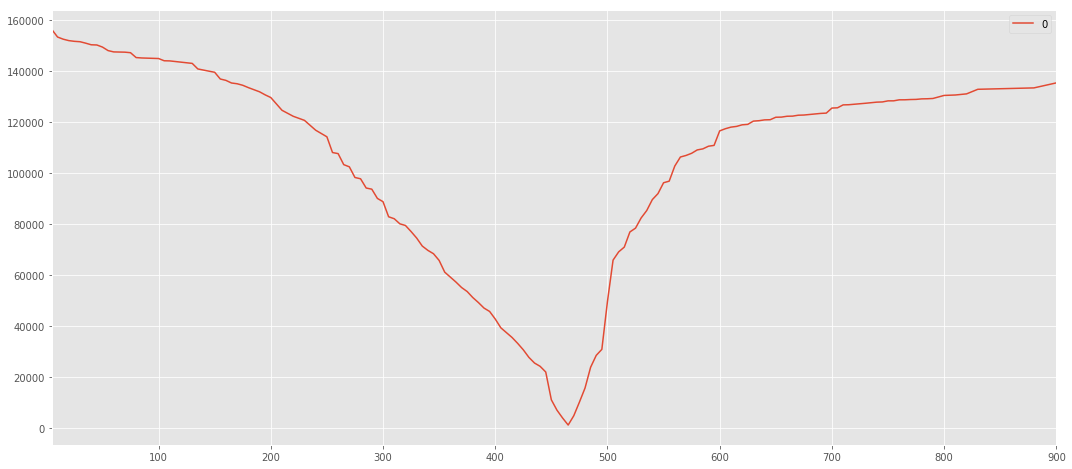

In [34]:
abs(pd.DataFrame(accion,index=[0]).T).plot(figsize=(18,8))

In [35]:
print('-Strike Peg:         ',strikepeg(accion))
print('-Última cotización:  ',round(pd.DataFrame(ultimo,index=[0])[acc][0],2))
print('-Open del día:       ',round(pd.DataFrame(o_hoy,index=[0])[acc][0],2))
print('-Cierre día anterior:',round(dat[acc][-1],2))

-Strike Peg:          470.0
-Última cotización:   503.22
-Open del día:        495.0
-Cierre día anterior: 503.22


In [36]:
c=OICCC[acc].dropna().reindex(pd.DataFrame(strikes)[acc].tolist())
p=OIPPP[acc].dropna().reindex(pd.DataFrame(strikes)[acc].tolist())

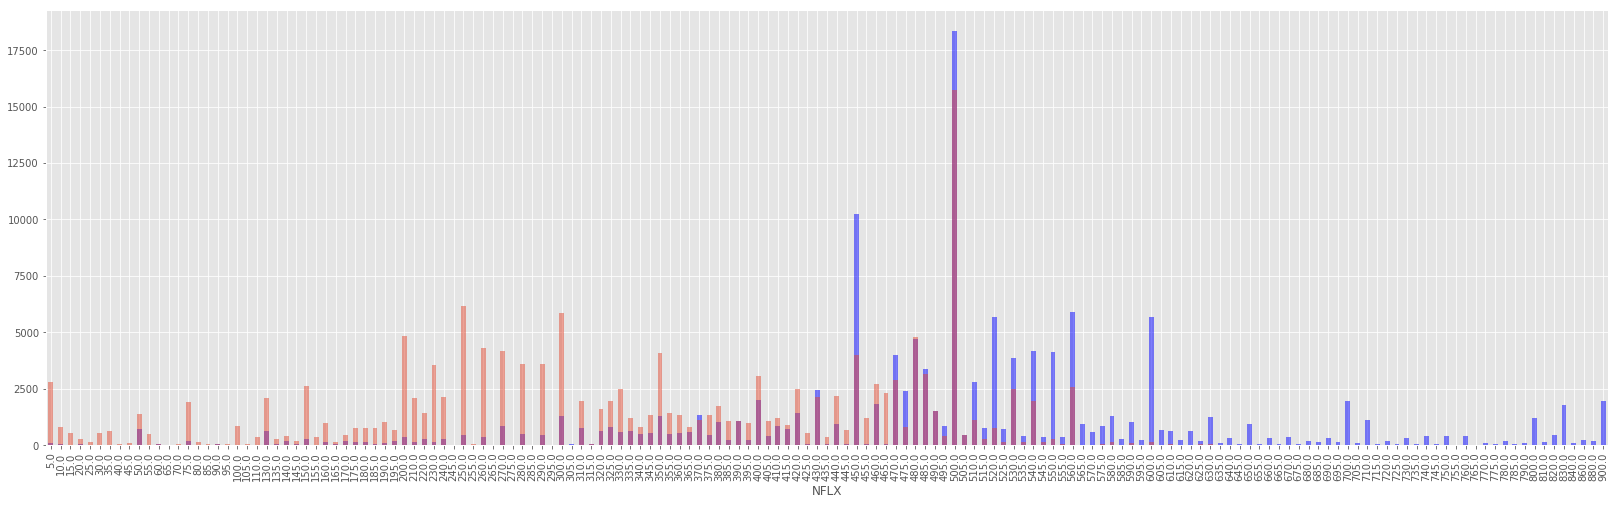

In [37]:
pd.merge(c,p,  how='outer', right_index=True, left_index=True)[acc+'_x'].iloc[:len(strikes[acc].dropna())].plot.bar(figsize=(28,8),color='b',alpha=0.5)
pd.merge(c,p,  how='outer', right_index=True, left_index=True)[acc+'_y'].iloc[:len(strikes[acc].dropna())].plot.bar(figsize=(28,8),alpha=0.5)

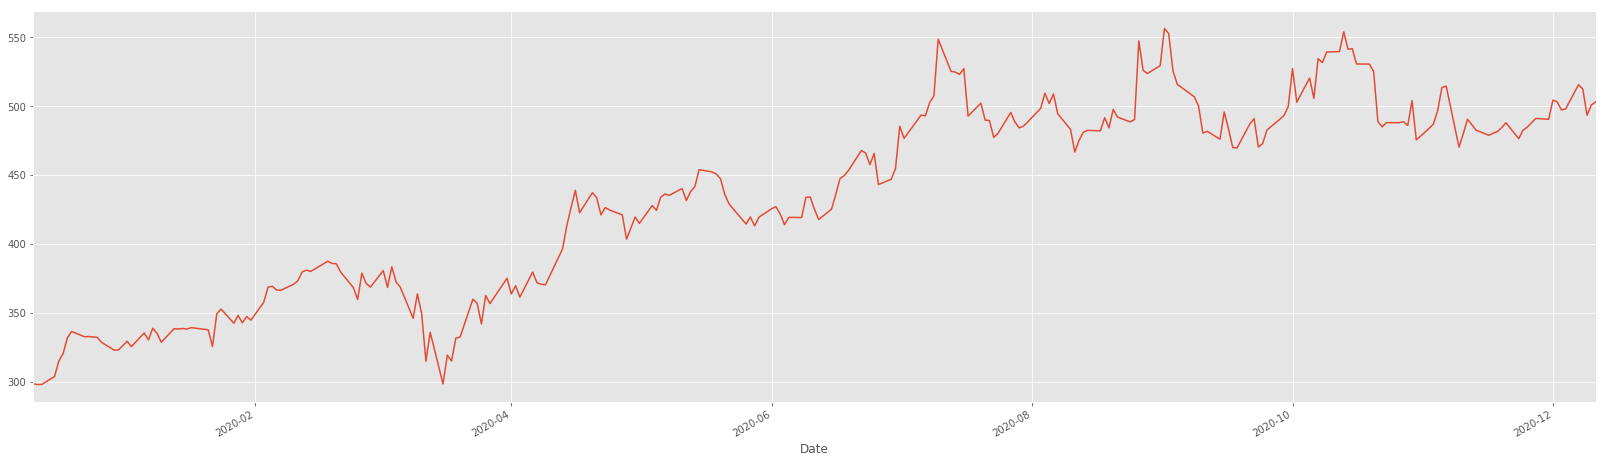

In [38]:
dat[acc].plot(figsize=(28,8))

[*********************100%***********************]  1 of 1 completed


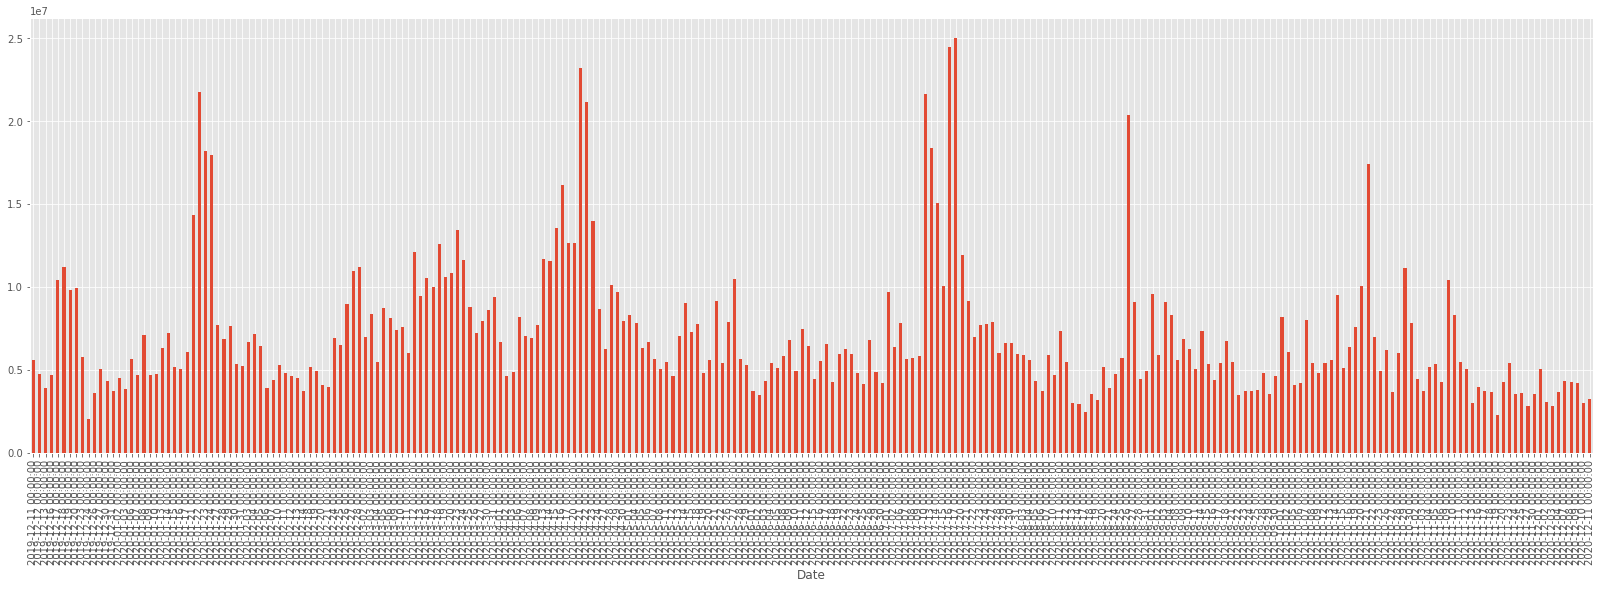

In [39]:
yf.download(acc, start="2019-12-12", end=time.strftime("%Y-%m-%d")).Volume.plot.bar(figsize=(28,8))

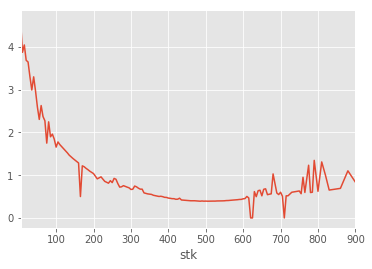

In [40]:
dfputs=pd.DataFrame(yf.Ticker(acc).option_chain(yf.Ticker(acc).options[v]).puts.impliedVolatility)
dfputs['stk']=yf.Ticker(acc).option_chain(yf.Ticker(acc).options[v]).puts.strike
dfputs.set_index(dfputs.stk).impliedVolatility.plot()

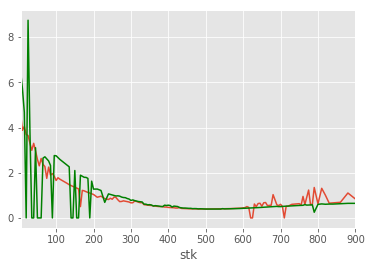

In [41]:
dfputs=pd.DataFrame(yf.Ticker(acc).option_chain(yf.Ticker(acc).options[v]).puts.impliedVolatility)
dfputs['stk']=yf.Ticker(acc).option_chain(yf.Ticker(acc).options[v]).puts.strike
dfputs.set_index(dfputs.stk).impliedVolatility.plot()
# TIENE DIFERENTE INDICE!!!!!!
df=pd.DataFrame(yf.Ticker(acc).option_chain(yf.Ticker(acc).options[v]).calls.impliedVolatility)
df['stk']=yf.Ticker(acc).option_chain(yf.Ticker(acc).options[v]).calls.strike
df.set_index(df.stk).impliedVolatility.plot(color='g')

In [42]:
round(-(pd.DataFrame(GOOGL,index=[0]).T).max()/(pd.DataFrame(GOOGL,index=[0]).T).min(),2)[0]

1.07

In [43]:
minIvol=df.set_index(df.stk).impliedVolatility.where(df.set_index(df.stk).impliedVolatility==min(df.set_index(df.stk).impliedVolatility)).dropna()
minIvolputs=dfputs.set_index(dfputs.stk).impliedVolatility.where(dfputs.set_index(dfputs.stk).impliedVolatility==min(dfputs.set_index(dfputs.stk).impliedVolatility)).dropna()

In [44]:
if minIvolputs.index[0]>minIvol.index[0]:
    print('Ivol_STK:',minIvolputs.index[0])
else:print('Ivol_STK:',minIvol.index[0])

Ivol_STK: 620.0


In [45]:
#################################################################################################

In [46]:
strikepeg(WMT), round(pd.DataFrame(o_hoy,index=[0]).WMT[0],2),round(dat.WMT[-1],2),round(-(pd.DataFrame(WMT,index=[0]).T).max()/(pd.DataFrame(WMT,index=[0]).T).min(),2)[0]

(145.0, 146.92, 147.0, 1.41)

In [47]:
d = {'GOOGL': [strikepeg(GOOGL), round(pd.DataFrame(o_hoy,index=[0]).GOOGL[0],2),round(dat.GOOGL[-1],2),round(-(pd.DataFrame(GOOGL,index=[0]).T).max()/(pd.DataFrame(GOOGL,index=[0]).T).min(),2)[0]],\
     'FB': [strikepeg(FB), round(pd.DataFrame(o_hoy,index=[0]).FB[0],2),round(dat.FB[-1],2),round(-(pd.DataFrame(FB,index=[0]).T).max()/(pd.DataFrame(FB,index=[0]).T).min(),2)[0]],\
     'NFLX': [strikepeg(NFLX), round(pd.DataFrame(o_hoy,index=[0]).NFLX[0],2),round(dat.NFLX[-1],2),round(-(pd.DataFrame(NFLX,index=[0]).T).max()/(pd.DataFrame(NFLX,index=[0]).T).min(),2)[0]],\
     'AAPL': [strikepeg(AAPL), round(pd.DataFrame(o_hoy,index=[0]).AAPL[0],2),round(dat.AAPL[-1],2),round(-(pd.DataFrame(AAPL,index=[0]).T).max()/(pd.DataFrame(AAPL,index=[0]).T).min(),2)[0]],\
     'SQ': [strikepeg(SQ), round(pd.DataFrame(o_hoy,index=[0]).SQ[0],2),round(dat.SQ[-1],2),round(-(pd.DataFrame(SQ,index=[0]).T).max()/(pd.DataFrame(SQ,index=[0]).T).min(),2)[0]],\
     'C': [strikepeg(C), round(pd.DataFrame(o_hoy,index=[0]).C[0],2),round(dat.C[-1],2),round(-(pd.DataFrame(C,index=[0]).T).max()/(pd.DataFrame(C,index=[0]).T).min(),2)[0]],\
     'CAT': [strikepeg(CAT), round(pd.DataFrame(o_hoy,index=[0]).CAT[0],2),round(dat.CAT[-1],2),round(-(pd.DataFrame(CAT,index=[0]).T).max()/(pd.DataFrame(CAT,index=[0]).T).min(),2)[0]],\
     'IBM': [strikepeg(IBM), round(pd.DataFrame(o_hoy,index=[0]).IBM[0],2),round(dat.IBM[-1],2),round(-(pd.DataFrame(IBM,index=[0]).T).max()/(pd.DataFrame(IBM,index=[0]).T).min(),2)[0]],\
     'JPM': [strikepeg(JPM), round(pd.DataFrame(o_hoy,index=[0]).JPM[0],2),round(dat.JPM[-1],2),round(-(pd.DataFrame(JPM,index=[0]).T).max()/(pd.DataFrame(JPM,index=[0]).T).min(),2)[0]],\
     'V': [strikepeg(V), round(pd.DataFrame(o_hoy,index=[0]).V[0],2),round(dat.V[-1],2),round(-(pd.DataFrame(V,index=[0]).T).max()/(pd.DataFrame(V,index=[0]).T).min(),2)[0]],\
     'PYPL': [strikepeg(PYPL), round(pd.DataFrame(o_hoy,index=[0]).PYPL[0],2),round(dat.PYPL[-1],2),round(-(pd.DataFrame(PYPL,index=[0]).T).max()/(pd.DataFrame(PYPL,index=[0]).T).min(),2)[0]],\
     'SBUX': [strikepeg(SBUX), round(pd.DataFrame(o_hoy,index=[0]).SBUX[0],2),round(dat.SBUX[-1],2),round(-(pd.DataFrame(SBUX,index=[0]).T).max()/(pd.DataFrame(SBUX,index=[0]).T).min(),2)[0]],\
     'CSCO': [strikepeg(CSCO), round(pd.DataFrame(o_hoy,index=[0]).CSCO[0],2),round(dat.CSCO[-1],2),round(-(pd.DataFrame(CSCO,index=[0]).T).max()/(pd.DataFrame(CSCO,index=[0]).T).min(),2)[0]],\
     'WMT': [strikepeg(WMT), round(pd.DataFrame(o_hoy,index=[0]).WMT[0],2),round(dat.WMT[-1],2),round(-(pd.DataFrame(WMT,index=[0]).T).max()/(pd.DataFrame(WMT,index=[0]).T).min(),2)[0]]}


df = pd.DataFrame(data=d,index=['strk','o_hoy','c_ayer','C/P']).T
df

,strk,o_hoy,c_ayer,C/P
GOOGL,1480.0,1760.00,1774.80,1.07
FB,250.0,274.53,273.55,1.00
NFLX,470.0,495.00,503.22,0.87
AAPL,105.0,122.43,122.41,1.02
SQ,120.0,218.26,216.59,0.76
C,52.5,59.80,58.93,1.04
CAT,150.0,176.99,179.29,0.73
IBM,125.0,124.08,124.27,1.16
JPM,105.0,118.94,119.56,1.22
V,195.0,205.36,206.24,1.10


In [48]:
df1=pd.DataFrame([df.T.unstack()],index=[time.strftime("%d-%m-%y")])
df1.T.unstack()

12-12-20                        
          strk    o_hoy   c_ayer   C/P
GOOGL   1480.0  1760.00  1774.80  1.07
FB       250.0   274.53   273.55  1.00
NFLX     470.0   495.00   503.22  0.87
AAPL     105.0   122.43   122.41  1.02
SQ       120.0   218.26   216.59  0.76
C         52.5    59.80    58.93  1.04
CAT      150.0   176.99   179.29  0.73
IBM      125.0   124.08   124.27  1.16
JPM      105.0   118.94   119.56  1.22
V        195.0   205.36   206.24  1.10
PYPL     170.0   213.39   214.06  1.04
SBUX      87.5   104.40   103.00  0.64
CSCO      44.0    43.94    44.32  0.98
WMT      145.0   146.92   147.00  1.41

In [49]:
yf.Ticker(I).options[v]

'2021-01-15'

In [50]:
pd.read_pickle(yf.Ticker(I).options[v]+'.pkl').T.unstack().T

FileNotFoundError: [Errno 2] No such file or directory: '2021-01-15.pkl'

#Guardado-------------------------------Sólo ejecutar en la primera descarga.
df1.to_pickle(yf.Ticker(I).options[v]+'.pkl')

In [51]:
# Se añaden datos del día a DataFrame anterior


pd.concat([pd.read_pickle(yf.Ticker(I).options[v]+'.pkl'), df1]).to_pickle(yf.Ticker(I).options[v]+'.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '2021-01-15.pkl'

In [52]:
pd.read_pickle(yf.Ticker(I).options[v]+'.pkl').T.unstack().T

FileNotFoundError: [Errno 2] No such file or directory: '2021-01-15.pkl'

In [53]:
pd.read_pickle(yf.Ticker(I).options[v]+'.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '2021-01-15.pkl'

In [54]:

pd.read_pickle(yf.Ticker(I).options[v]+'.pkl').loc['16-05-20':].GOOGL

FileNotFoundError: [Errno 2] No such file or directory: '2021-01-15.pkl'

In [55]:
pd.read_pickle(yf.Ticker(I).options[v]+'.pkl').T.swaplevel(0, 1).T.strk

FileNotFoundError: [Errno 2] No such file or directory: '2021-01-15.pkl'

In [56]:

pd.read_pickle(yf.Ticker(I).options[v]+'.pkl').loc['16-05-20':].WMT.strk.plot(C='G')
pd.read_pickle(yf.Ticker(I).options[v]+'.pkl').loc['16-05-20':].WMT.o_hoy.plot()

FileNotFoundError: [Errno 2] No such file or directory: '2021-01-15.pkl'